<center>
    <img src="https://gitlab.com/ibm/skills-network/courses/placeholder101/-/raw/master/labs/module%201/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


*   Visualize the distribution of data.

*   Visualize the relationship between two features.

*   Visualize composition of data.

*   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2021-11-12 21:43:30--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 198.23.119.245
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|198.23.119.245|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite’

m4_survey_data.sqli 100%[===================>]  34.98M  2.46MB/s    in 7.5s    

2021-11-12 21:43:38 (4.69 MB/s) - ‘m4_survey_data.sqlite’ saved [36679680/36679680]



Connect to the database.


In [2]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [3]:
import pandas as pd

## Demo: How to run an sql query


In [4]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [5]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [8]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age asc
limit 10
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Demo: How to describe a table


In [12]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql 
FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


<AxesSubplot:ylabel='Frequency'>

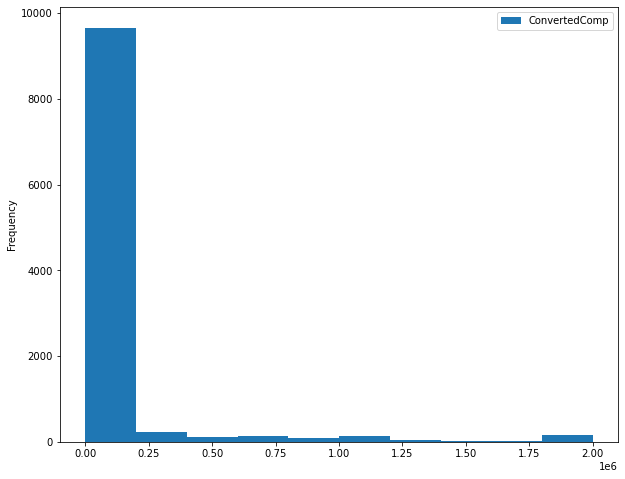

In [11]:
# your code goes here
import matplotlib.pyplot as plt
Query2 = """
SELECT ConvertedComp 
FROM master
"""

Age= pd.read_sql_query(Query2, conn)
Age.plot(kind='hist', figsize=(10, 8))

### Box Plots


Plot a box plot of `Age.`


<AxesSubplot:>

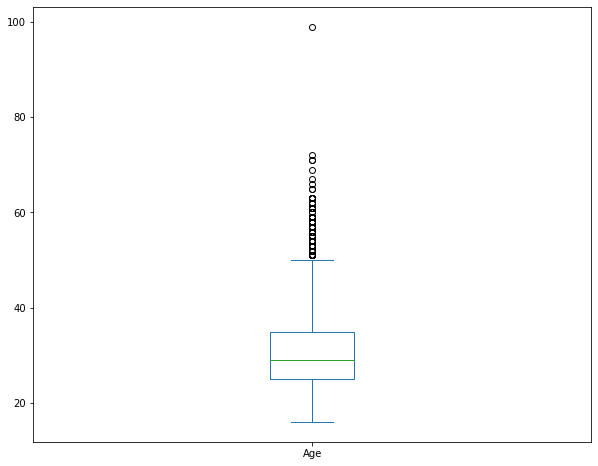

In [13]:
# your code goes here
Query2 = """
SELECT Age 
FROM master
"""

Age= pd.read_sql_query(Query2, conn)
Age.plot(kind='box', figsize=(10, 8))

## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


<AxesSubplot:xlabel='Age', ylabel='WorkWeekHrs'>

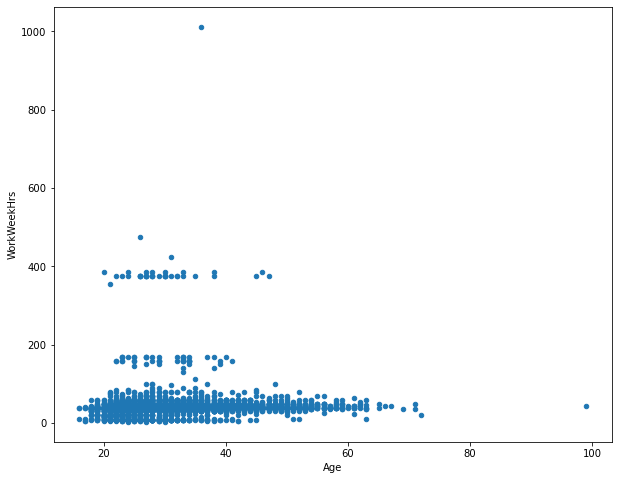

In [16]:
# your code goes here
Query2 = """
SELECT Age, WorkWeekHrs 
FROM master
"""

Age_workweekhrs= pd.read_sql_query(Query2, conn)
Age_workweekhrs.plot.scatter(x='Age', y='WorkWeekHrs', figsize=(10, 8))

<AxesSubplot:xlabel='Age', ylabel='WorkWeekHrs'>

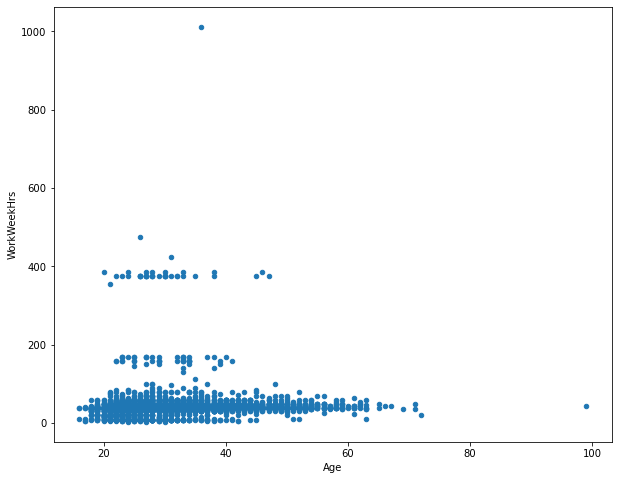

In [20]:
Query2 = """
SELECT Age, WorkWeekHrs 
FROM master
"""

Age_workweekhrs= pd.read_sql_query(Query2, conn)
Age_workweekhrs.plot(kind='scatter', x='Age', y='WorkWeekHrs', figsize=(10, 8))

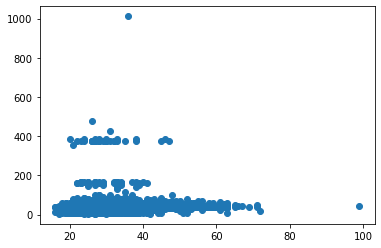

In [35]:
Query3= """
SELECT Age
FROM master
"""
Query4= """
SELECT WorkWeekHrs
FROM master
"""

Query5="""
SELECT Age, WorkWeekHrs
FROM master
"""
Age=pd.read_sql_query(Query3, conn)
WorkWeekHrs= pd.read_sql_query(Query4, conn)
Age_WorkWeekHrs=pd.read_sql_query(Query5, conn)
plt.scatter(x=Age, y=WorkWeekHrs)

### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


<AxesSubplot:xlabel='WorkWeekHrs', ylabel='CodeRevHrs'>

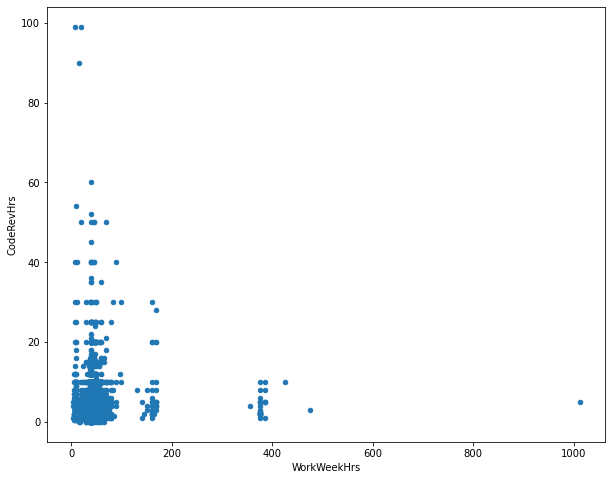

In [43]:
import matplotlib.pyplot as plt
Query6 = """
SELECT WorkWeekHrs, CodeRevHrs, Age 
FROM master
"""

workweekhrs_CodeRevHrs_Age= pd.read_sql_query(Query6, conn)
workweekhrs_CodeRevHrs_Age.plot(kind='scatter', x='WorkWeekHrs', y='CodeRevHrs', figsize=(10, 8))

<AxesSubplot:xlabel='WorkWeekHrs', ylabel='CodeRevHrs'>

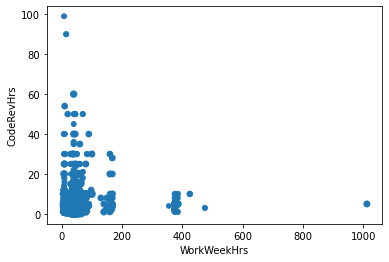

In [51]:
size = workweekhrs_CodeRevHrs_Age["Age"]
workweekhrs_CodeRevHrs_Age.plot.scatter(x='WorkWeekHrs', y='CodeRevHrs', s = size)

## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


([<matplotlib.patches.Wedge at 0x7fda2d166c70>,
 [Text(1.1736914154044327, 1.1597191303957783, 'PostgreSQL'),
  Text(-0.9921837807065633, 1.3183593384592953, 'MongoDB'),
  Text(-1.5602426637717488, -0.536789372236856, 'Redis'),
  Text(-0.08034500476514456, -1.6480426815496283, 'MySQL'),
  Text(1.4365316698453372, -0.8117122405947612, 'Elasticsearch')],
 [Text(0.6401953174933268, 0.6325740711249699, '24.8%'),
  Text(-0.5411911531126707, 0.71910509370507, '20.9%'),
  Text(-0.8510414529664083, -0.292794203038285, '19.1%'),
  Text(-0.043824548053715204, -0.8989323717543425, '18.8%'),
  Text(0.7835627290065474, -0.44275213123350604, '16.4%')])

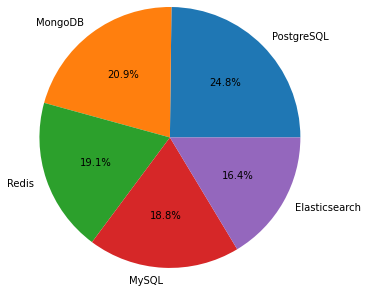

In [42]:
# your code goes here
Query7="""
SELECT DatabaseDesireNextYear, count(*) as count
FROM DatabaseDesireNextYear
group by DatabaseDesireNextYear
order by count desc
limit 5
"""

DatabaseDesireNextYear = pd.read_sql_query(Query7, conn)

x = DatabaseDesireNextYear['count']
label = DatabaseDesireNextYear['DatabaseDesireNextYear']
plt.pie(x, labels=label, autopct='%1.1f%%',radius=1.5)

### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


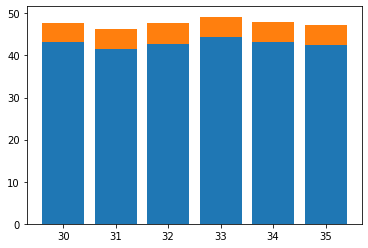

In [57]:
Query8 = """
SELECT Avg(WorkWeekHrs), Avg(CodeRevHrs), Age 
FROM master 
where Age between 30 and 35
group by Age
"""

z = pd.read_sql_query(Query8, conn)
WorkWeekHrs= z['Avg(WorkWeekHrs)']
CodeRevHrs= z['Avg(CodeRevHrs)']
Age= z['Age']

fig, ax = plt.subplots()

ax.bar(Age, WorkWeekHrs, label='WorkWeekHrs')
ax.bar(Age, CodeRevHrs, bottom=WorkWeekHrs,
       label='CodeRevHrs')

plt.show()

<AxesSubplot:>

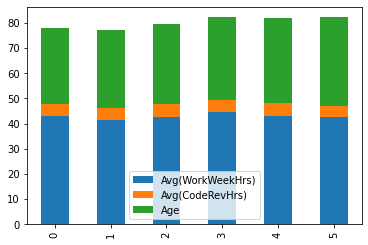

In [58]:
z = pd.read_sql_query(Query8, conn)
z.plot.bar(stacked=True)

## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


   Avg(ConvertedComp)   Age
0        85446.644118  25.0
1        96878.398519  26.0
2       121776.398496  27.0
3       114056.507545  28.0
4       153095.391104  29.0
5       124685.391162  30.0


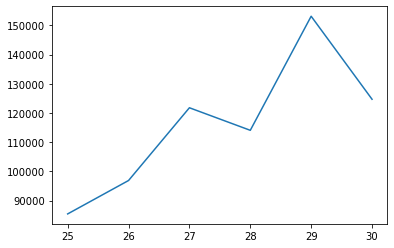

In [68]:
# your code goes here
Query9 = """
SELECT Avg(ConvertedComp), Age 
FROM master 
where Age between 25 and 30
group by Age
"""
ConvertedComp_Age = pd.read_sql_query(Query9, conn)
ConvertedComp_Age
plt.plot(ConvertedComp_Age['Age'], ConvertedComp_Age['Avg(ConvertedComp)'])
print(ConvertedComp_Age)

<AxesSubplot:>

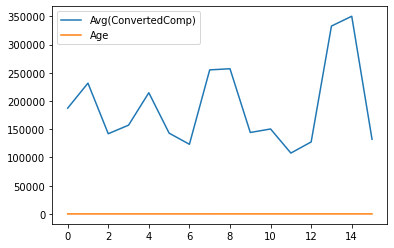

In [61]:
ConvertedComp_Age.plot()

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


<AxesSubplot:>

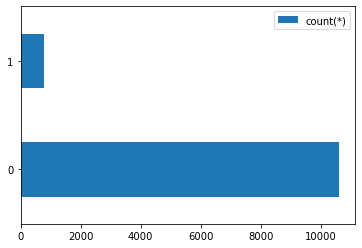

In [66]:
# your code goes here
Query10="""
SELECT MainBranch, count(*)
FROM master
group by MainBranch
"""
MainBranch = pd.read_sql_query(Query10, conn)

MainBranch.plot(kind='barh', stacked=False)

<AxesSubplot:>

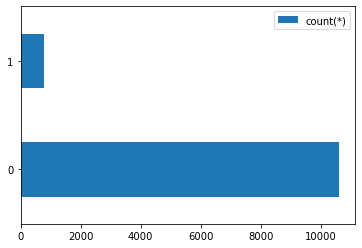

In [67]:
MainBranch.plot.barh(stacked=False)

Close the database connection.


In [ ]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2021-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
